In [1]:
# 以下は必要なライブラリのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3

'%.3f'

In [3]:
# bank-full.csvをダウンロード・解凍して読み込む
import os
import zipfile
import urllib.request
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
zip_path = "bank.zip"
csv_path = "bank-full.csv"

# ダウンロード
if not os.path.exists(csv_path):
    if not os.path.exists(zip_path):
        print("Downloading bank.zip...")
        urllib.request.urlretrieve(url, zip_path)
    # 解凍
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')
    print("Extracted bank-full.csv.")

# CSV読み込み
bank_data = pd.read_csv(csv_path, sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# 基本統計量の算出
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
# 預金を申し込む人（y='yes'）と申し込まない人（y='no'）で各カテゴリの件数を集計
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in cols:
    print(f'--- {col} ---')
    print(pd.crosstab(bank_data[col], bank_data['y']))
    print()

--- job ---
y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

--- marital ---
y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

--- education ---
y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252

--- default ---
y           no   yes
default             
no       39159  5237
yes        763    52

--- housing ---
y           no   yes
housing             
no       16727  3354
yes      23195  1935

--- loan ---
y        no   yes
loan             
no    33162  4805
yes    6760   484



In [6]:
# データの分割（特徴量Xと目的変数y）
from sklearn.model_selection import train_test_split

# 目的変数（y）を数値化（yes:1, no:0）
bank_data['y_bin'] = bank_data['y'].map({'yes': 1, 'no': 0})

# 説明変数（ダミー変数化）
X = pd.get_dummies(bank_data.drop(['y', 'y_bin'], axis=1))
y = bank_data['y_bin']

# 学習用・テスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print('学習データ:', X_train.shape, y_train.shape)
print('テストデータ:', X_test.shape, y_test.shape)

学習データ: (36168, 51) (36168,)
テストデータ: (9043, 51) (9043,)


In [8]:
# ロジスティック回帰（標準化＋パイプライン）による学習・予測・評価
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# パイプラインで標準化＋ロジスティック回帰
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, random_state=0))
pipe.fit(X_train, y_train)

# 予測
y_pred = pipe.predict(X_test)

# 精度評価
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=['no', 'yes'])

print('ロジスティック回帰の正解率:', acc)
print('混同行列:\n', cm)
print('分類レポート:\n', cr)

ロジスティック回帰の正解率: 0.9001437576025655
混同行列:
 [[7784  201]
 [ 702  356]]
分類レポート:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.64      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



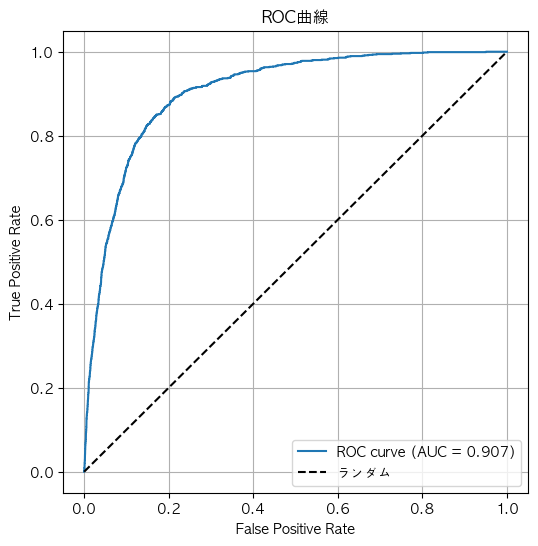

AUC: 0.906625608270706


In [10]:
# ROC曲線の描画とAUC算出（日本語フォント対応）
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib as mpl

# 日本語フォント設定（Macの場合）
mpl.rcParams['font.family'] = 'AppleGothic'  # または 'Hiragino Sans' など適宜変更

# 予測確率の取得
y_proba = pipe.predict_proba(X_test)[:, 1]

# ROC曲線の算出
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# ROC曲線の描画
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='ランダム')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲線')
plt.legend()
plt.grid()
plt.show()

print('AUC:', auc)